# Import libraries

In [143]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive

import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

from wordcloud import WordCloud
import re



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the data

In [145]:
df = pd.read_csv("/content/drive/MyDrive/Unstructured/Final_Project/data/tweet_sentiments.csv")

In [146]:
df

,Unnamed: 0,date,id,replyCount,retweetCount,likeCount,quoteCount,sourceLabel,text_cleaned,nltk_scores,nltk_cmp_score,nltk_sentiment,textblob_score,textblob_sentiment,stanza_score,stanza_sentiment,composite_score,composite_sentiment
0,0,2020-03-11,1237891016566300674,0,0,0,0,Twitter for Android,No vaccine for the flu either.,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5859}",-0.5859,Negative,0.000000,Neutral,-1.000000,Negative,-0.528633,Negative
1,1,2020-03-11,1237890996848881664,1,0,0,0,Twitter for iPad,"My previous tweet the US are predicting of their nation will get it.Theyre having great difficulty developing a vaccine, as its evolving too quick for them.It must be wonderful knowing youll be fine, so fuck the rest of us!Im working with my docs to keep me informed.","{'neg': 0.119, 'neu': 0.71, 'pos': 0.171, 'compound': 0.459}",0.4590,Positive,0.330556,Positive,-0.500000,Negative,0.096519,Positive
2,2,2020-03-11,1237890983104147456,0,0,0,0,Twitter Web App,"Not a good scenario. Have you ever seen I Am Legend with Will Smith? A miracle cure all vaccine ultimately turned people into violen, lightningfast zombies.","{'neg': 0.088, 'neu': 0.772, 'pos': 0.14, 'compound': 0.3387}",0.3387,Positive,-0.175000,Negative,-0.666667,Negative,-0.167656,Negative
3,3,2020-03-11,1237890981149564933,1,0,2,0,Twitter for iPhone,"I have a question. If we can make vaccines for coronavirus why dont we have one for the common cold, which is a coronavirus?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,-0.450000,Negative,-0.500000,Negative,-0.316667,Negative
4,4,2020-03-11,1237890964452044801,0,0,0,0,Twitter for Android,"You are very optimistic. million people will be infected at its peak at the same time, not million in total. Many people will be infected more than once or twice. dead recovered. will be infected more than once. months till vaccine is ready","{'neg': 0.248, 'neu': 0.661, 'pos': 0.091, 'compound': -0.8692}",-0.8692,Negative,0.212500,Positive,0.000000,Neutral,-0.218900,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168737,168737,2021-03-10,1369799326936035333,1,0,0,0,Twitter for iPhone,All I did was obey and wear a mask. All I did was obey and take the experimental vaccine.....sheep!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.125000,Positive,-0.500000,Negative,-0.125000,Negative
168738,168738,2021-03-10,1369799326273318920,0,0,0,0,Twitter for Android,"Dont worry, Kylie! I am going to book an appointment as soon as possible after the local pharmacies here in Toronto get the vaccines. I will be happy to answer any questions after I get my shot! Okay?","{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.822}",0.8220,Positive,0.375000,Positive,0.500000,Positive,0.565667,Positive
168739,168739,2021-03-10,1369799322548731904,1,0,2,0,Twitter Web App,Did Trump discover the formula for the vaccine while in the bunker at the th hole at Doral?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.000000,Neutral,0.000000,Neutral,0.000000,Neutral
168740,168740,2021-03-10,1369799320095121411,0,0,0,0,WordPress.com,Black and Hispanic Communities Grapple With VaccineMisinformation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,-0.166667,Negative,0.000000,Neutral,-0.055556,Negative


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168742 entries, 0 to 168741
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           168742 non-null  int64  
 1   date                 168742 non-null  object 
 2   id                   168742 non-null  int64  
 3   replyCount           168742 non-null  int64  
 4   retweetCount         168742 non-null  int64  
 5   likeCount            168742 non-null  int64  
 6   quoteCount           168742 non-null  int64  
 7   sourceLabel          168658 non-null  object 
 8   text_cleaned         168742 non-null  object 
 9   nltk_scores          168742 non-null  object 
 10  nltk_cmp_score       168742 non-null  float64
 11  nltk_sentiment       168742 non-null  object 
 12  textblob_score       168742 non-null  float64
 13  textblob_sentiment   168742 non-null  object 
 14  stanza_score         168742 non-null  float64
 15  stanza_sentiment 

## Change date format and set index

In [148]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.drop(columns=['Unnamed: 0'], inplace=True)

In [149]:
df

,id,replyCount,retweetCount,likeCount,quoteCount,sourceLabel,text_cleaned,nltk_scores,nltk_cmp_score,nltk_sentiment,textblob_score,textblob_sentiment,stanza_score,stanza_sentiment,composite_score,composite_sentiment
date,,,,,,,,,,,,,,,,
2020-03-11,1237891016566300674,0,0,0,0,Twitter for Android,No vaccine for the flu either.,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5859}",-0.5859,Negative,0.000000,Neutral,-1.000000,Negative,-0.528633,Negative
2020-03-11,1237890996848881664,1,0,0,0,Twitter for iPad,"My previous tweet the US are predicting of their nation will get it.Theyre having great difficulty developing a vaccine, as its evolving too quick for them.It must be wonderful knowing youll be fine, so fuck the rest of us!Im working with my docs to keep me informed.","{'neg': 0.119, 'neu': 0.71, 'pos': 0.171, 'compound': 0.459}",0.4590,Positive,0.330556,Positive,-0.500000,Negative,0.096519,Positive
2020-03-11,1237890983104147456,0,0,0,0,Twitter Web App,"Not a good scenario. Have you ever seen I Am Legend with Will Smith? A miracle cure all vaccine ultimately turned people into violen, lightningfast zombies.","{'neg': 0.088, 'neu': 0.772, 'pos': 0.14, 'compound': 0.3387}",0.3387,Positive,-0.175000,Negative,-0.666667,Negative,-0.167656,Negative
2020-03-11,1237890981149564933,1,0,2,0,Twitter for iPhone,"I have a question. If we can make vaccines for coronavirus why dont we have one for the common cold, which is a coronavirus?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,-0.450000,Negative,-0.500000,Negative,-0.316667,Negative
2020-03-11,1237890964452044801,0,0,0,0,Twitter for Android,"You are very optimistic. million people will be infected at its peak at the same time, not million in total. Many people will be infected more than once or twice. dead recovered. will be infected more than once. months till vaccine is ready","{'neg': 0.248, 'neu': 0.661, 'pos': 0.091, 'compound': -0.8692}",-0.8692,Negative,0.212500,Positive,0.000000,Neutral,-0.218900,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-10,1369799326936035333,1,0,0,0,Twitter for iPhone,All I did was obey and wear a mask. All I did was obey and take the experimental vaccine.....sheep!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.125000,Positive,-0.500000,Negative,-0.125000,Negative
2021-03-10,1369799326273318920,0,0,0,0,Twitter for Android,"Dont worry, Kylie! I am going to book an appointment as soon as possible after the local pharmacies here in Toronto get the vaccines. I will be happy to answer any questions after I get my shot! Okay?","{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.822}",0.8220,Positive,0.375000,Positive,0.500000,Positive,0.565667,Positive
2021-03-10,1369799322548731904,1,0,2,0,Twitter Web App,Did Trump discover the formula for the vaccine while in the bunker at the th hole at Doral?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.000000,Neutral,0.000000,Neutral,0.000000,Neutral


# Compare four sentiment scores

In [150]:
nltk_sentiment= pd.DataFrame(df['nltk_sentiment'].value_counts())
nltk_sentiment['type'] = "nltk"
nltk_sentiment.reset_index(inplace=True)
nltk_sentiment.columns=['sentiment', 'count','type']
nltk_sentiment

,sentiment,count,type
0,Positive,68042,nltk
1,Negative,61989,nltk
2,Neutral,38711,nltk


In [151]:
textblob_sentiment=pd.DataFrame(df['textblob_sentiment'].value_counts())
textblob_sentiment['type'] = "textblob"
textblob_sentiment.reset_index(inplace=True)
textblob_sentiment.columns=['sentiment', 'count','type']
textblob_sentiment

,sentiment,count,type
0,Positive,72253,textblob
1,Neutral,63321,textblob
2,Negative,33168,textblob


In [152]:
stanza_sentiment=pd.DataFrame(df['stanza_sentiment'].value_counts())
stanza_sentiment['type'] = "stanza"
stanza_sentiment.reset_index(inplace=True)
stanza_sentiment.columns=['sentiment', 'count','type']
stanza_sentiment

,sentiment,count,type
0,Negative,105797,stanza
1,Neutral,47901,stanza
2,Positive,15044,stanza


In [153]:
composite_sentiment=pd.DataFrame(df['composite_sentiment'].value_counts())
composite_sentiment['type'] = "composite"
composite_sentiment.reset_index(inplace=True)
composite_sentiment.columns=['sentiment', 'count','type']
composite_sentiment

,sentiment,count,type
0,Negative,91161,composite
1,Positive,49402,composite
2,Neutral,28179,composite


In [154]:
temp_df = nltk_sentiment.append(textblob_sentiment, ignore_index=True).append(stanza_sentiment, ignore_index=True).append(composite_sentiment, ignore_index=True)
temp_df['percent'] = temp_df['count']/len(df)
temp_df

,sentiment,count,type,percent
0,Positive,68042,nltk,0.403231
1,Negative,61989,nltk,0.367360
2,Neutral,38711,nltk,0.229409
3,Positive,72253,textblob,0.428186
4,Neutral,63321,textblob,0.375253
5,Negative,33168,textblob,0.196560
6,Negative,105797,stanza,0.626975
7,Neutral,47901,stanza,0.283871
8,Positive,15044,stanza,0.089154
9,Negative,91161,composite,0.540239


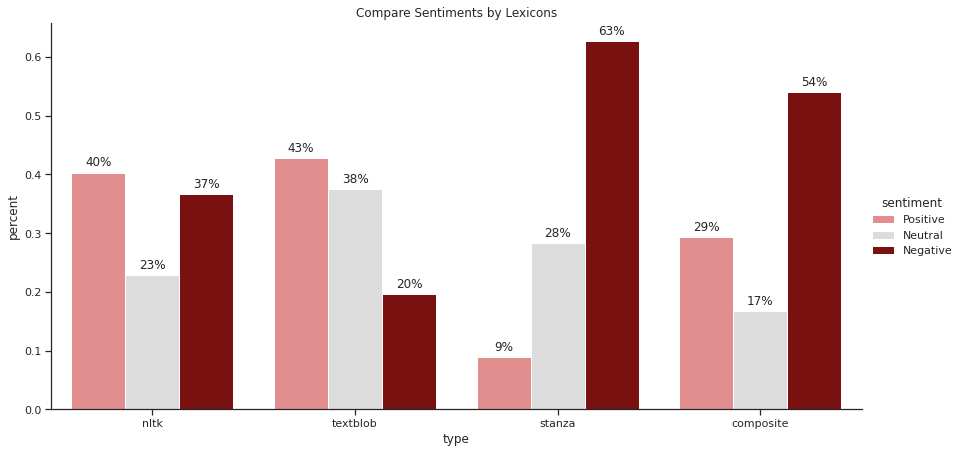

In [155]:
sns.set_theme(style="ticks")

g=sns.catplot(x="type", y="percent", hue='sentiment', kind="bar", data=temp_df, height=6,aspect=2/1, hue_order=['Positive','Neutral', 'Negative'], 
           palette={'Positive':"lightcoral", "Neutral":"gainsboro", 'Negative': "darkred"}).set(title='Compare Sentiments by Lexicons')

for ax in g.axes.ravel():
  for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Different lexicons provide us very different results. Stanza is more negative while textblob is more positive. Nltk is in between. We created the composite score to get an average of the three.

In [156]:
df_by_date=df.reset_index().groupby(['date']).mean()
df_by_date

,id,replyCount,retweetCount,likeCount,quoteCount,nltk_cmp_score,textblob_score,stanza_score,composite_score
date,,,,,,,,,
2020-03-11,1.237888e+18,0.427966,0.415254,2.294492,0.048729,-0.079321,0.066680,-0.398882,-0.137174
2020-03-12,1.238251e+18,0.452479,0.473140,2.923554,0.066116,-0.044613,0.058888,-0.390106,-0.125277
2020-03-13,1.238613e+18,2.829268,4.201220,17.428862,0.623984,-0.021347,0.072410,-0.364503,-0.104480
2020-03-14,1.238976e+18,1.315011,3.219873,7.775899,0.266385,-0.018473,0.069500,-0.379017,-0.109330
2020-03-15,1.239339e+18,0.606335,1.545249,4.638009,0.149321,0.010950,0.060696,-0.308678,-0.079011
...,...,...,...,...,...,...,...,...,...
2021-03-06,1.368350e+18,0.524520,0.307036,2.471215,0.042644,0.052413,0.092000,-0.295629,-0.050406
2021-03-07,1.368712e+18,0.533191,0.576017,3.501071,0.051392,0.005728,0.071906,-0.349057,-0.090474
2021-03-08,1.369075e+18,1.020877,1.960334,10.870564,0.173278,0.077800,0.080873,-0.309014,-0.050114


Text(0.5, 1.0, 'Sentiment scores over time (daily)')

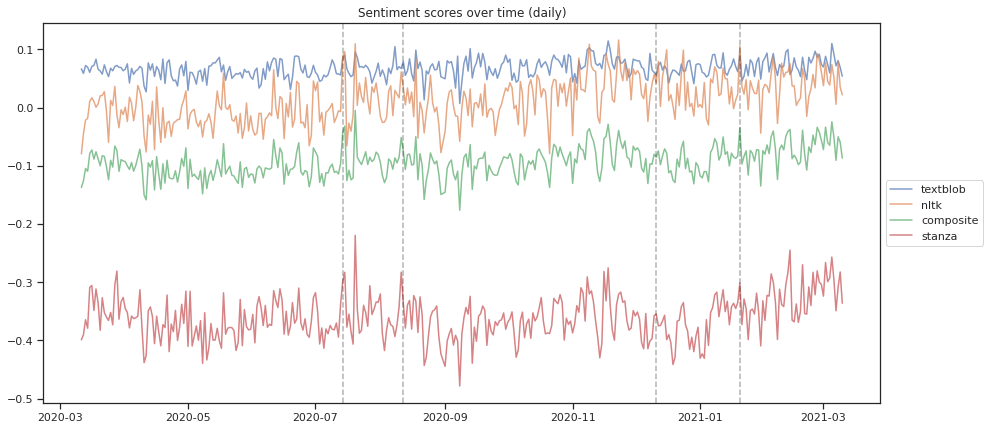

In [157]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(df_by_date.index, "textblob_score", data=df_by_date, label="textblob", alpha=0.7)
ax.plot(df_by_date.index, "nltk_cmp_score", data=df_by_date, label="nltk", alpha=0.7)
ax.plot(df_by_date.index, "composite_score", data=df_by_date, label="composite", alpha=0.7)
ax.plot(df_by_date.index, "stanza_score", data=df_by_date, label="stanza", alpha=0.7)

#add reference line to get insights
ax.axvline(x=pd.to_datetime('2020-07-14'), color='black', alpha=0.3, linestyle='--' ) # Publish of phase I/II clinical trial data for Moderna
ax.axvline(x=pd.to_datetime('2020-08-12'), color='black', alpha=0.3, linestyle='--') # Publish of phase I/II clinical trial data for Pfizer
ax.axvline(x=pd.to_datetime('2020-12-11'),color='black', alpha=0.3, linestyle='--') # FDA granted an Emergency Use Authorization (EUA) for the Pfizer-BioNTech vaccine
ax.axvline(x=pd.to_datetime('2021-01-20'),color='black', alpha=0.3, linestyle='--') # Biden administration promised 100 Million Vaccinations in the First 100 Days
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Sentiment scores over time (daily)")

Some fluctuations duirng the important time points of Covid vaccine development and vaccination process.

In [158]:
#resample weekly
df_by_date_weekly = df_by_date.reset_index().resample('W', on='date').mean()
df_by_date_weekly

,id,replyCount,retweetCount,likeCount,quoteCount,nltk_cmp_score,textblob_score,stanza_score,composite_score
date,,,,,,,,,
2020-03-15,1.238614e+18,1.126212,1.970947,7.012163,0.230907,-0.030561,0.065635,-0.368237,-0.111054
2020-03-22,1.240787e+18,0.670698,1.135309,4.404959,0.112854,0.014803,0.069583,-0.337385,-0.084333
2020-03-29,1.243323e+18,0.680772,1.897331,6.633049,0.163238,-0.008458,0.065618,-0.342835,-0.095225
2020-04-05,1.245861e+18,0.660332,0.937733,3.924899,0.129489,-0.004990,0.063016,-0.350828,-0.097601
2020-04-12,1.248398e+18,0.749999,1.904666,6.639818,0.558314,-0.008786,0.058303,-0.374852,-0.108445
2020-04-19,1.250935e+18,0.752505,1.533957,4.736438,0.165807,-0.019270,0.065691,-0.376060,-0.109880
2020-04-26,1.253472e+18,0.873538,2.015480,7.065924,0.200896,-0.031722,0.055192,-0.374883,-0.117138
2020-05-03,1.256008e+18,1.401537,1.867083,10.368392,0.254203,-0.004026,0.060681,-0.362340,-0.101895
2020-05-10,1.258545e+18,0.876553,0.990714,4.011904,0.147258,-0.025619,0.052859,-0.394047,-0.122269


Text(0.5, 1.0, 'Sentiment scores over time (weekly)')

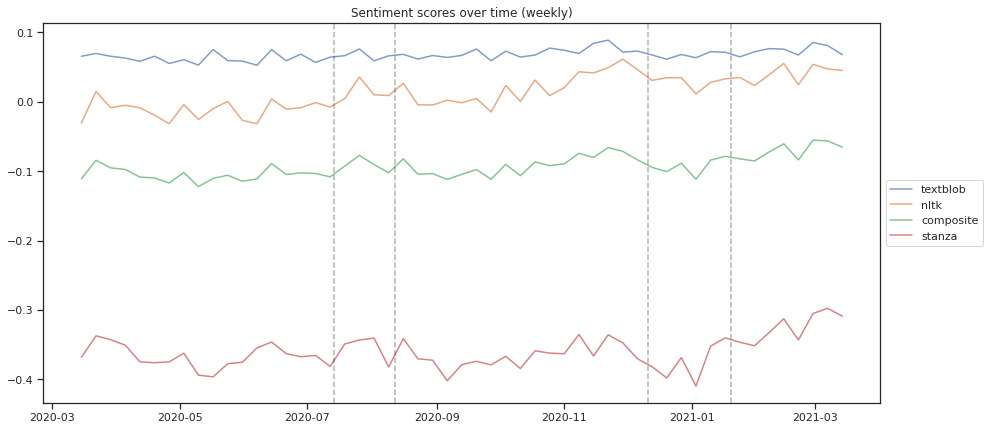

In [159]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(df_by_date_weekly.index, "textblob_score", data=df_by_date_weekly, label="textblob", alpha=0.7)
ax.plot(df_by_date_weekly.index, "nltk_cmp_score", data=df_by_date_weekly, label="nltk", alpha=0.7)
ax.plot(df_by_date_weekly.index, "composite_score", data=df_by_date_weekly, label="composite", alpha=0.7)
ax.plot(df_by_date_weekly.index, "stanza_score", data=df_by_date_weekly, label="stanza", alpha=0.7)
ax.axvline(x=pd.to_datetime('2020-07-14'), color='black', alpha=0.3, linestyle='--' )
ax.axvline(x=pd.to_datetime('2020-08-12'), color='black', alpha=0.3, linestyle='--')
ax.axvline(x=pd.to_datetime('2020-12-11'),color='black', alpha=0.3, linestyle='--')
ax.axvline(x=pd.to_datetime('2021-01-20'),color='black', alpha=0.3, linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Sentiment scores over time (weekly)")


## Compare likes, replies, retweets and quotes

In [160]:
nltk_df = df.groupby(['nltk_sentiment']).mean()
nltk_df=nltk_df[['replyCount','retweetCount', 'likeCount', 'quoteCount']]
nltk_df['type'] = "nltk"
nltk_df.reset_index(inplace=True)
nltk_df.rename(columns={'nltk_sentiment':'sentiment'}, inplace=True)
nltk_df



,sentiment,replyCount,retweetCount,likeCount,quoteCount,type
0,Negative,0.902547,1.841778,8.301602,0.204294,nltk
1,Neutral,0.835344,2.195836,11.593036,0.319754,nltk
2,Positive,1.054510,2.460745,11.674436,0.367993,nltk


In [161]:
textblob_df = df.groupby(['textblob_sentiment']).mean()
textblob_df=textblob_df[['replyCount','retweetCount', 'likeCount', 'quoteCount']]
textblob_df['type'] = "textblob"
textblob_df.reset_index(inplace=True)
textblob_df.rename(columns={'textblob_sentiment':'sentiment'}, inplace=True)
textblob_df

,sentiment,replyCount,retweetCount,likeCount,quoteCount,type
0,Negative,0.983237,2.656838,11.673511,0.285154,textblob
1,Neutral,0.762685,2.036733,10.024668,0.295305,textblob
2,Positive,1.095179,2.069354,10.183370,0.303434,textblob


In [162]:
stanza_df = df.groupby(['stanza_sentiment']).mean()
stanza_df=stanza_df[['replyCount','retweetCount', 'likeCount', 'quoteCount']]
stanza_df['type'] = "stanza"
stanza_df.reset_index(inplace=True)
stanza_df.rename(columns={'stanza_sentiment':'sentiment'}, inplace=True)
stanza_df

,sentiment,replyCount,retweetCount,likeCount,quoteCount,type
0,Negative,0.938231,2.099483,9.342051,0.272749,stanza
1,Neutral,0.898290,2.269660,12.490783,0.326883,stanza
2,Positive,1.179540,2.377626,11.370380,0.370048,stanza


In [163]:
composite_df = df.groupby(['composite_sentiment']).mean()
composite_df=composite_df[['replyCount','retweetCount', 'likeCount', 'quoteCount']]
composite_df['type'] = "composite"
composite_df.reset_index(inplace=True)
composite_df.rename(columns={'composite_sentiment':'sentiment'}, inplace=True)
composite_df

,sentiment,replyCount,retweetCount,likeCount,quoteCount,type
0,Negative,0.861959,1.836410,8.276269,0.240311,composite
1,Neutral,0.942830,2.951702,14.306327,0.455623,composite
2,Positive,1.111109,2.348528,12.147828,0.310413,composite


In [164]:
like_df = nltk_df.append(textblob_df, ignore_index=True).append(stanza_df, ignore_index=True).append(composite_df, ignore_index=True)

like_df

,sentiment,replyCount,retweetCount,likeCount,quoteCount,type
0,Negative,0.902547,1.841778,8.301602,0.204294,nltk
1,Neutral,0.835344,2.195836,11.593036,0.319754,nltk
2,Positive,1.054510,2.460745,11.674436,0.367993,nltk
3,Negative,0.983237,2.656838,11.673511,0.285154,textblob
4,Neutral,0.762685,2.036733,10.024668,0.295305,textblob
5,Positive,1.095179,2.069354,10.183370,0.303434,textblob
6,Negative,0.938231,2.099483,9.342051,0.272749,stanza
7,Neutral,0.898290,2.269660,12.490783,0.326883,stanza
8,Positive,1.179540,2.377626,11.370380,0.370048,stanza
9,Negative,0.861959,1.836410,8.276269,0.240311,composite


(0.0, 15.0)

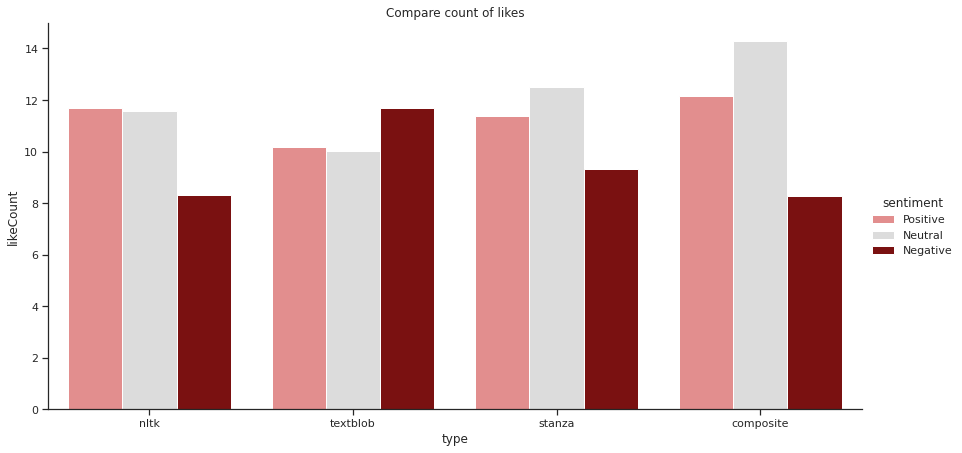

In [165]:
sns.set_theme(style="ticks")

sns.catplot(x="type", y="likeCount", hue='sentiment', kind="bar", data=like_df, height=6,aspect=2/1, hue_order=['Positive','Neutral', 'Negative'], 
           palette={'Positive':"lightcoral", "Neutral":"gainsboro", 'Negative': "darkred"}).set(title='Compare count of likes')

plt.ylim(0,15) 


Except for texblob, people gave more likes to positive and neutral comments.

(0.0, 15.0)

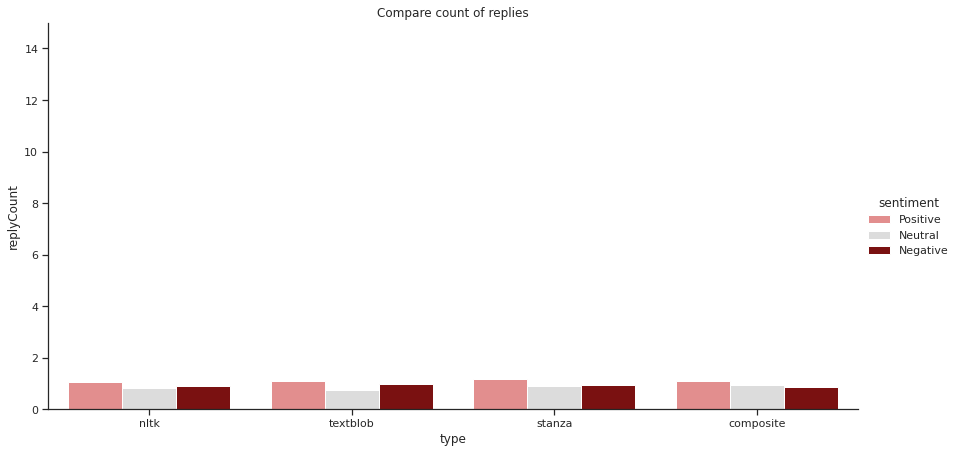

In [166]:
sns.set_theme(style="ticks")

sns.catplot(x="type", y="replyCount", hue='sentiment', kind="bar", data=like_df, height=6,aspect=2/1, hue_order=['Positive','Neutral', 'Negative'], 
           palette={'Positive':"lightcoral", "Neutral":"gainsboro", 'Negative': "darkred"}).set(title='Compare count of replies')
           
plt.ylim(0, 15)

(0.0, 15.0)

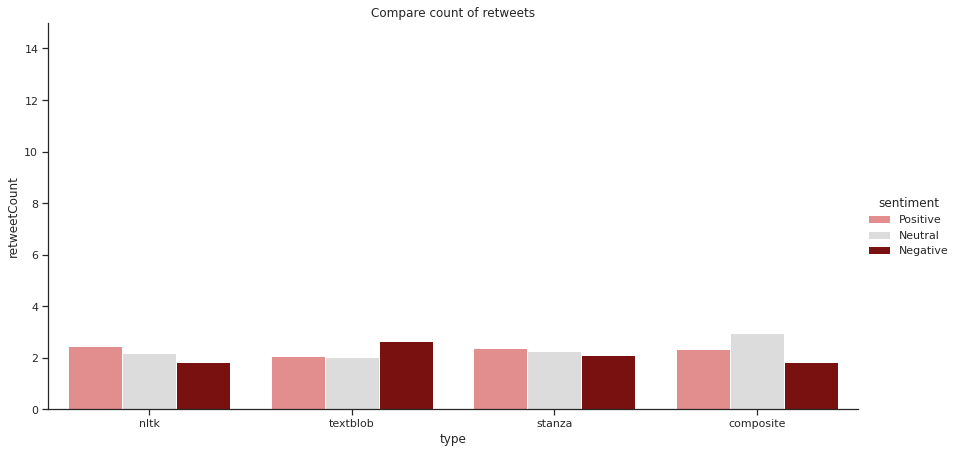

In [167]:
sns.set_theme(style="ticks")

sns.catplot(x="type", y="retweetCount", hue='sentiment', kind="bar", data=like_df, height=6,aspect=2/1, hue_order=['Positive','Neutral', 'Negative'], 
           palette={'Positive':"lightcoral", "Neutral":"gainsboro", 'Negative': "darkred"}).set(title='Compare count of retweets')
           
plt.ylim(0, 15)

(0.0, 15.0)

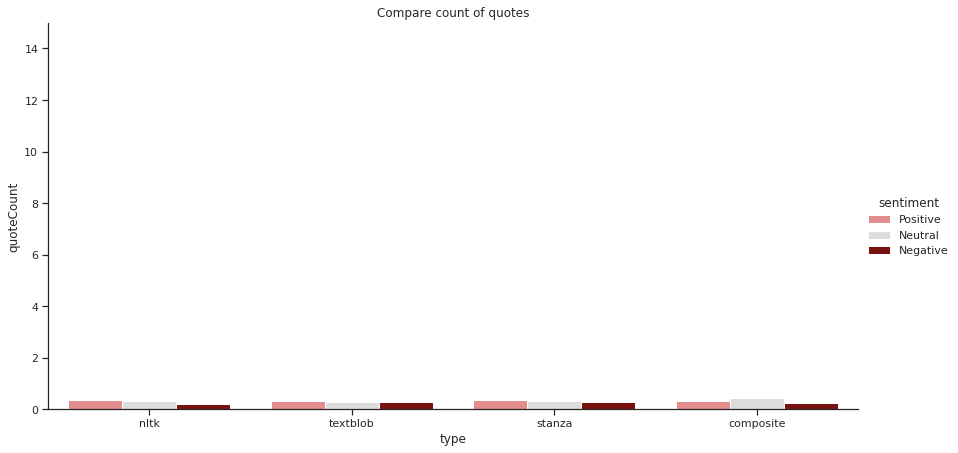

In [168]:
sns.set_theme(style="ticks")

sns.catplot(x="type", y="quoteCount", hue='sentiment', kind="bar", data=like_df, height=6,aspect=2/1, hue_order=['Positive','Neutral', 'Negative'], 
           palette={'Positive':"lightcoral", "Neutral":"gainsboro", 'Negative': "darkred"}).set(title='Compare count of quotes')
           
plt.ylim(0, 15)

## Plot word clouds for positive, negative and nuetral tweets

### Remove punctuations, lower text

In [169]:
pd.set_option('display.max_colwidth', None)
df['text_lem']=df['text_cleaned'].str.replace('[^\w\s]','')

df['text_lem']=df['text_lem'].str.lower()

# Remove words with 2 or fewer letters
df['text_lem'] = df['text_lem'].apply(lambda x: re.sub(r'\b\w{1,2}\b', '',x))

df[['text_lem']]


,text_lem
date,
2020-03-11,vaccine for the flu either
2020-03-11,previous tweet the are predicting their nation will get ittheyre having great difficulty developing vaccine its evolving too quick for themit must wonderful knowing youll fine fuck the rest usim working with docs keep informed
2020-03-11,not good scenario have you ever seen legend with will smith miracle cure all vaccine ultimately turned people into violen lightningfast zombies
2020-03-11,have question can make vaccines for coronavirus why dont have one for the common cold which coronavirus
2020-03-11,you are very optimistic million people will infected its peak the same time not million total many people will infected more than once twice dead recovered will infected more than once months till vaccine ready
...,...
2021-03-10,all did was obey and wear mask all did was obey and take the experimental vaccinesheep
2021-03-10,dont worry kylie going book appointment soon possible after the local pharmacies here toronto get the vaccines will happy answer any questions after get shot okay
2021-03-10,did trump discover the formula for the vaccine while the bunker the hole doral


### Lemmatization + Tokenization

In [170]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

In [171]:
df['text_words'] = df['text_lem'].apply(lambda x: lemmatize_text(x))

In [172]:
df[['text_cleaned','text_lem','text_words']]

,text_cleaned,text_lem,text_words
date,,,
2020-03-11,No vaccine for the flu either.,vaccine for the flu either,"[vaccine, for, the, flu, either]"
2020-03-11,"My previous tweet the US are predicting of their nation will get it.Theyre having great difficulty developing a vaccine, as its evolving too quick for them.It must be wonderful knowing youll be fine, so fuck the rest of us!Im working with my docs to keep me informed.",previous tweet the are predicting their nation will get ittheyre having great difficulty developing vaccine its evolving too quick for themit must wonderful knowing youll fine fuck the rest usim working with docs keep informed,"[previous, tweet, the, are, predicting, their, nation, will, get, ittheyre, having, great, difficulty, developing, vaccine, it, evolving, too, quick, for, themit, must, wonderful, knowing, youll, fine, fuck, the, rest, usim, working, with, doc, keep, informed]"
2020-03-11,"Not a good scenario. Have you ever seen I Am Legend with Will Smith? A miracle cure all vaccine ultimately turned people into violen, lightningfast zombies.",not good scenario have you ever seen legend with will smith miracle cure all vaccine ultimately turned people into violen lightningfast zombies,"[not, good, scenario, have, you, ever, seen, legend, with, will, smith, miracle, cure, all, vaccine, ultimately, turned, people, into, violen, lightningfast, zombie]"
2020-03-11,"I have a question. If we can make vaccines for coronavirus why dont we have one for the common cold, which is a coronavirus?",have question can make vaccines for coronavirus why dont have one for the common cold which coronavirus,"[have, question, can, make, vaccine, for, coronavirus, why, dont, have, one, for, the, common, cold, which, coronavirus]"
2020-03-11,"You are very optimistic. million people will be infected at its peak at the same time, not million in total. Many people will be infected more than once or twice. dead recovered. will be infected more than once. months till vaccine is ready",you are very optimistic million people will infected its peak the same time not million total many people will infected more than once twice dead recovered will infected more than once months till vaccine ready,"[you, are, very, optimistic, million, people, will, infected, it, peak, the, same, time, not, million, total, many, people, will, infected, more, than, once, twice, dead, recovered, will, infected, more, than, once, month, till, vaccine, ready]"
...,...,...,...
2021-03-10,All I did was obey and wear a mask. All I did was obey and take the experimental vaccine.....sheep!,all did was obey and wear mask all did was obey and take the experimental vaccinesheep,"[all, did, wa, obey, and, wear, mask, all, did, wa, obey, and, take, the, experimental, vaccinesheep]"
2021-03-10,"Dont worry, Kylie! I am going to book an appointment as soon as possible after the local pharmacies here in Toronto get the vaccines. I will be happy to answer any questions after I get my shot! Okay?",dont worry kylie going book appointment soon possible after the local pharmacies here toronto get the vaccines will happy answer any questions after get shot okay,"[dont, worry, kylie, going, book, appointment, soon, possible, after, the, local, pharmacy, here, toronto, get, the, vaccine, will, happy, answer, any, question, after, get, shot, okay]"
2021-03-10,Did Trump discover the formula for the vaccine while in the bunker at the th hole at Doral?,did trump discover the formula for the vaccine while the bunker the hole doral,"[did, trump, discover, the, formula, for, the, vaccine, while, the, bunker, the, hole, doral]"


### Remove stopwords

In [173]:
stop_words = stopwords.words('english')
stop_words


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [174]:
newStopWords = ['ha','wa','dont','doesnt','etc','would','wont','thats','isnt','could','couldnt','cant']
stop_words.extend(newStopWords)

In [175]:
df['text_words'] = df['text_words'].apply(lambda x: [item for item in x if item not in stop_words])

In [176]:
df[['text_cleaned','text_lem','text_words']]

,text_cleaned,text_lem,text_words
date,,,
2020-03-11,No vaccine for the flu either.,vaccine for the flu either,"[vaccine, flu, either]"
2020-03-11,"My previous tweet the US are predicting of their nation will get it.Theyre having great difficulty developing a vaccine, as its evolving too quick for them.It must be wonderful knowing youll be fine, so fuck the rest of us!Im working with my docs to keep me informed.",previous tweet the are predicting their nation will get ittheyre having great difficulty developing vaccine its evolving too quick for themit must wonderful knowing youll fine fuck the rest usim working with docs keep informed,"[previous, tweet, predicting, nation, get, ittheyre, great, difficulty, developing, vaccine, evolving, quick, themit, must, wonderful, knowing, youll, fine, fuck, rest, usim, working, doc, keep, informed]"
2020-03-11,"Not a good scenario. Have you ever seen I Am Legend with Will Smith? A miracle cure all vaccine ultimately turned people into violen, lightningfast zombies.",not good scenario have you ever seen legend with will smith miracle cure all vaccine ultimately turned people into violen lightningfast zombies,"[good, scenario, ever, seen, legend, smith, miracle, cure, vaccine, ultimately, turned, people, violen, lightningfast, zombie]"
2020-03-11,"I have a question. If we can make vaccines for coronavirus why dont we have one for the common cold, which is a coronavirus?",have question can make vaccines for coronavirus why dont have one for the common cold which coronavirus,"[question, make, vaccine, coronavirus, one, common, cold, coronavirus]"
2020-03-11,"You are very optimistic. million people will be infected at its peak at the same time, not million in total. Many people will be infected more than once or twice. dead recovered. will be infected more than once. months till vaccine is ready",you are very optimistic million people will infected its peak the same time not million total many people will infected more than once twice dead recovered will infected more than once months till vaccine ready,"[optimistic, million, people, infected, peak, time, million, total, many, people, infected, twice, dead, recovered, infected, month, till, vaccine, ready]"
...,...,...,...
2021-03-10,All I did was obey and wear a mask. All I did was obey and take the experimental vaccine.....sheep!,all did was obey and wear mask all did was obey and take the experimental vaccinesheep,"[obey, wear, mask, obey, take, experimental, vaccinesheep]"
2021-03-10,"Dont worry, Kylie! I am going to book an appointment as soon as possible after the local pharmacies here in Toronto get the vaccines. I will be happy to answer any questions after I get my shot! Okay?",dont worry kylie going book appointment soon possible after the local pharmacies here toronto get the vaccines will happy answer any questions after get shot okay,"[worry, kylie, going, book, appointment, soon, possible, local, pharmacy, toronto, get, vaccine, happy, answer, question, get, shot, okay]"
2021-03-10,Did Trump discover the formula for the vaccine while in the bunker at the th hole at Doral?,did trump discover the formula for the vaccine while the bunker the hole doral,"[trump, discover, formula, vaccine, bunker, hole, doral]"


## All tweets word cloud


In [177]:
# split sentences to get individual words
all_words = []
for line in df['text_words']:
    all_words.extend(line)

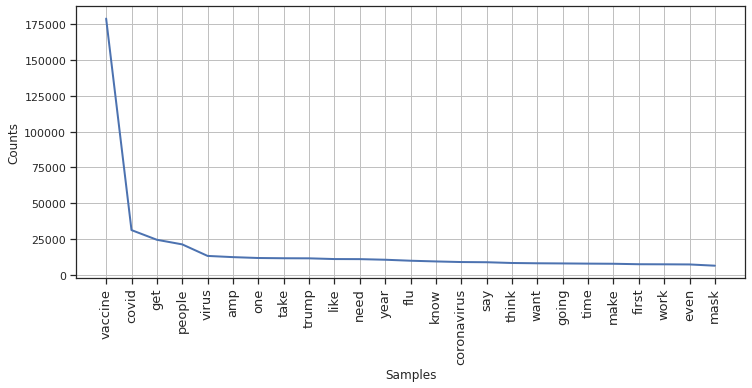

In [178]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = FreqDist(all_words)
fd.plot(25,cumulative=False)

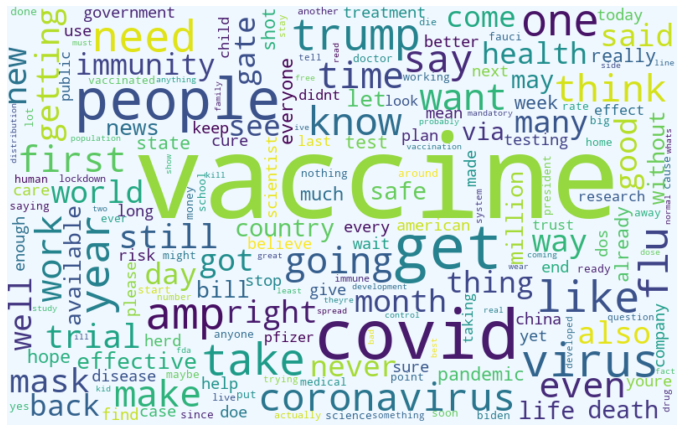

In [179]:
#WordCloud
wc = WordCloud(width=800, height=500, max_words=200, background_color='aliceblue').generate_from_frequencies(fd)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Positive tweets word cloud

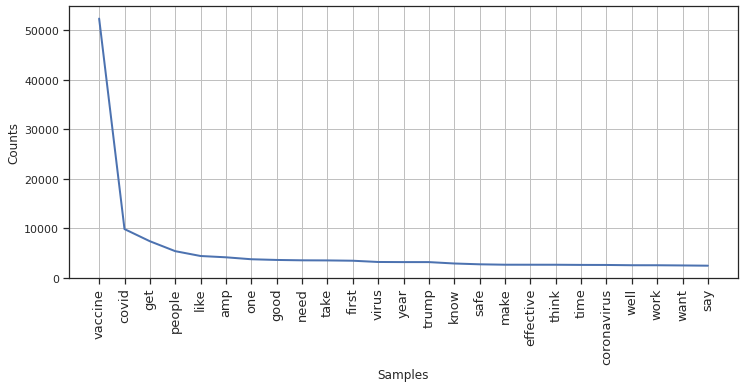

In [180]:
# split sentences to get individual words
mask = df['composite_sentiment']=='Positive'
all_words = []
for line in df[mask]['text_words']:
    all_words.extend(line)

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = FreqDist(all_words)
fd.plot(25,cumulative=False)


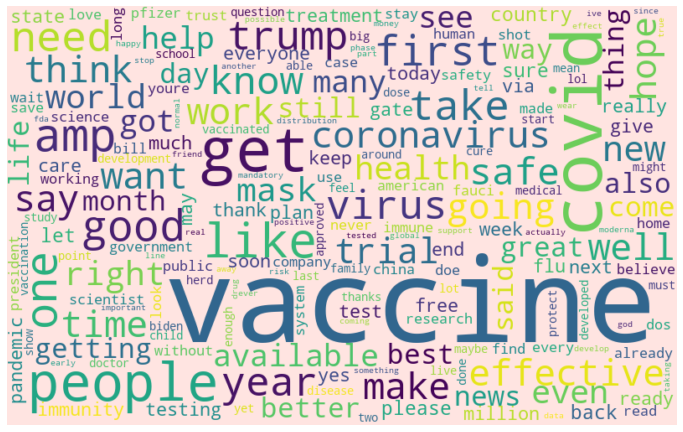

In [181]:
#WordCloud
wc = WordCloud(width=800, height=500, max_words=200,background_color='mistyrose').generate_from_frequencies(fd)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Negative tweets word cloud

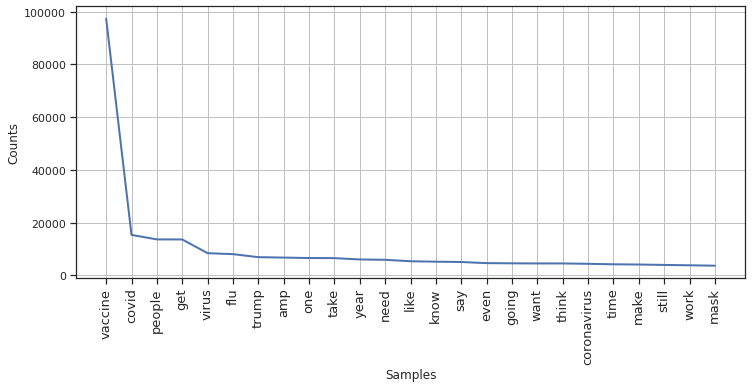

In [182]:
# split sentences to get individual words
mask = df['composite_sentiment']=='Negative'
all_words = []
for line in df[mask]['text_words']:
    all_words.extend(line)

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = FreqDist(all_words)
fd.plot(25,cumulative=False)


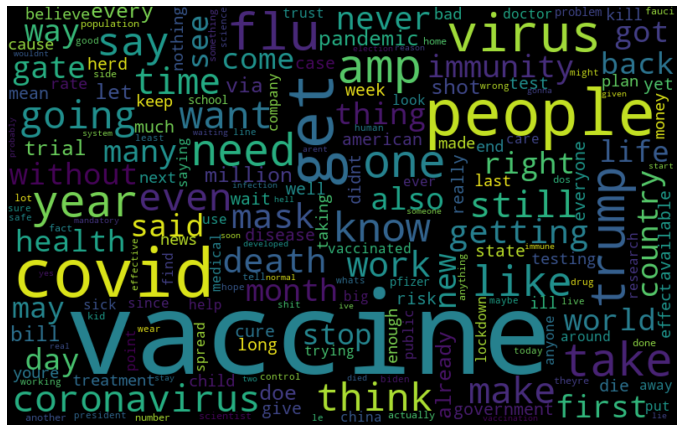

In [183]:
#WordCloud
wc = WordCloud(width=800, height=500, max_words=200).generate_from_frequencies(fd)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Neutral tweets word cloud

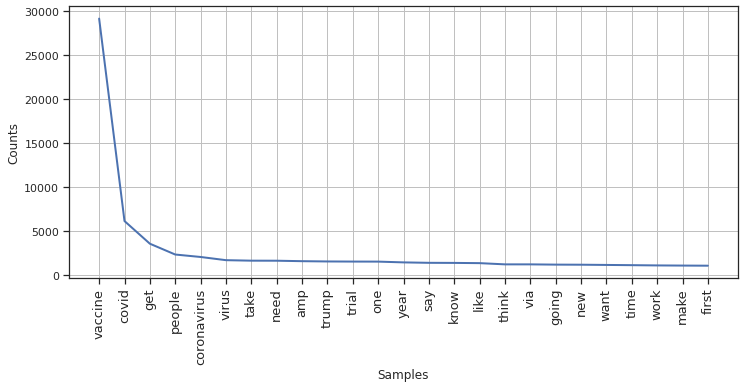

In [184]:
# split sentences to get individual words
mask = df['composite_sentiment']=='Neutral'
all_words = []
for line in df[mask]['text_words']:
    all_words.extend(line)

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = FreqDist(all_words)
fd.plot(25,cumulative=False)

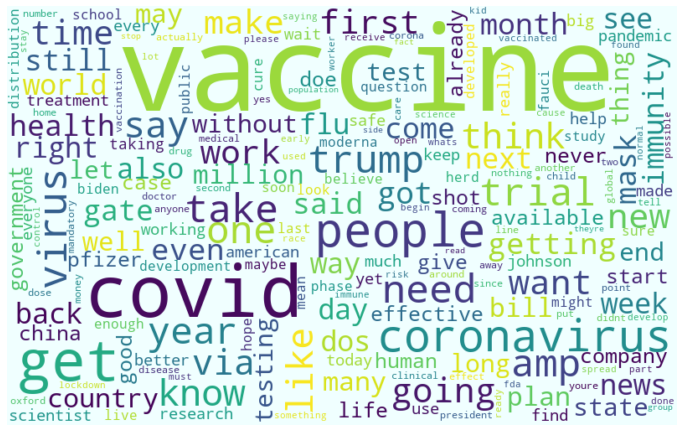

In [185]:
#WordCloud
wc = WordCloud(width=800, height=500, max_words=200, background_color='azure').generate_from_frequencies(fd)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Conclusion:
1. Different lexicons provide very different sentiment results, but the yearly trend is similar. 

2. Key time points have impacts on the sentiments on Twitter. Positive sentiments increased over time since the mass vaccination campaign


Reference:

1. [Shah,Parthvi  May 19,2020. Basic Tweet Preprocessing in Python](https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e)
2. [Wahome, Ronald  Sep 7, 2018. This Is How Twitter Sees The World : Sentiment Analysis Part One](https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb)